In [90]:
using Pkg; Pkg.activate(".")
using CSV
using DataFrames
using PyPlot
using LaTeXStrings
using MUST
using DelimitedFiles
using Statistics
MUST.@import_dispatch "../../../dispatch2"

  Activating environment at `/cobra/ptmp/peitner/model_grid/MUST.jl/examples/running_dispatch/Project.toml`


PyObject <module 'dispatch' from '/cobra/ptmp/peitner/model_grid/dispatch2/utilities/python/dispatch/__init__.py'>

In [6]:
results = DataFrame(CSV.File("summary.csv"));

In [34]:
t, rho, ee0, ee_min, successP1, successP2 = eachcol(results[:,[:tt_K, :d_cgs, :ee0, :ee_min, :phase1_success, :phase2_success]]);

# Phase 1 (no RT)

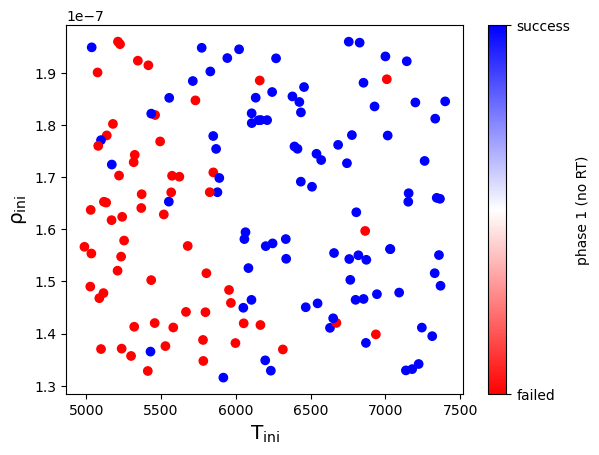

In [49]:
im = plt.scatter(t, rho, c=successP1, cmap="bwr_r")
plt.xlabel(L"\rm T_{ini}", fontsize="x-large")
plt.ylabel(L"\rm \rho_{ini}", fontsize="x-large")
cbar = plt.colorbar(im)
cbar.set_label("phase 1 (no RT)")
cbar.set_ticks([0,1])
cbar.set_ticklabels(["failed", "success"])

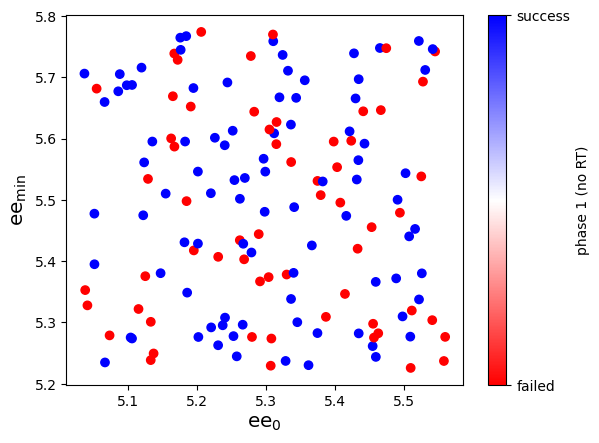

In [50]:
im = plt.scatter(ee0, ee_min, c=successP1, cmap="bwr_r")
plt.xlabel(L"\rm ee_{0}", fontsize="x-large")
plt.ylabel(L"\rm ee_{min}", fontsize="x-large")
cbar = plt.colorbar(im)
cbar.set_label("phase 1 (no RT)")
cbar.set_ticks([0,1])
cbar.set_ticklabels(["failed", "success"])

# Phase 2 (with RT)

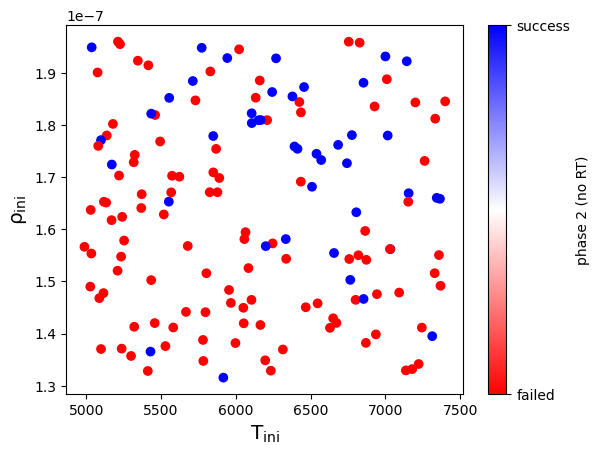

In [51]:
im = plt.scatter(t, rho, c=successP2, cmap="bwr_r")
plt.xlabel(L"\rm T_{ini}", fontsize="x-large")
plt.ylabel(L"\rm \rho_{ini}", fontsize="x-large")
cbar = plt.colorbar(im)
cbar.set_label("phase 2 (no RT)")
cbar.set_ticks([0,1])
cbar.set_ticklabels(["failed", "success"])

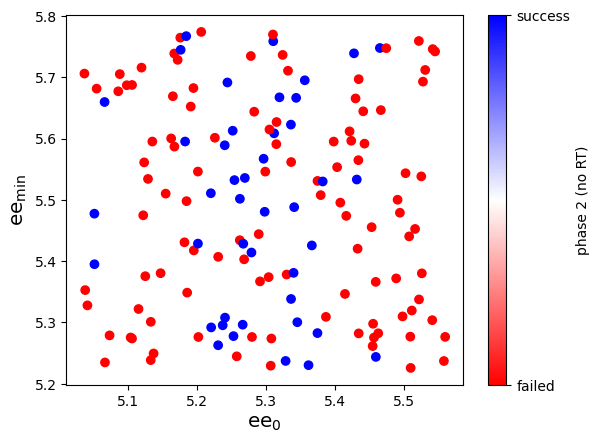

In [52]:
im = plt.scatter(ee0, ee_min, c=successP2, cmap="bwr_r")
plt.xlabel(L"\rm ee_{0}", fontsize="x-large")
plt.ylabel(L"\rm ee_{min}", fontsize="x-large")
cbar = plt.colorbar(im)
cbar.set_label("phase 2 (no RT)")
cbar.set_ticks([0,1])
cbar.set_ticklabels(["failed", "success"])

# Effective temperature of successful runs

In [81]:
get_teff(folder) = begin
    path = joinpath(folder, "teff.dat")
    if !ispath(path) @warn "$(path) does not exist."
        return nothing
    end
    data = readdlm(path)
end 

get_teff (generic function with 1 method)

In [68]:
folders = [@MUST.in_dispatch(joinpath("data",r[1:first(findfirst(".nml",r))-1])) for r in results[results.phase2_success .== true, :phase2_name]];

In [82]:
teff = [get_teff(f) for f in folders];

┌ Warning: /cobra/ptmp/peitner/model_grid/dispatch2/experiments/stellar_atmospheres/data/grid38_phase2/teff.dat does not exist.
└ @ Main In[81]:3
┌ Warning: /cobra/ptmp/peitner/model_grid/dispatch2/experiments/stellar_atmospheres/data/grid47_phase2/teff.dat does not exist.
└ @ Main In[81]:3
┌ Warning: /cobra/ptmp/peitner/model_grid/dispatch2/experiments/stellar_atmospheres/data/grid74_phase2/teff.dat does not exist.
└ @ Main In[81]:3
┌ Warning: /cobra/ptmp/peitner/model_grid/dispatch2/experiments/stellar_atmospheres/data/grid85_phase2/teff.dat does not exist.
└ @ Main In[81]:3
┌ Warning: /cobra/ptmp/peitner/model_grid/dispatch2/experiments/stellar_atmospheres/data/grid102_phase2/teff.dat does not exist.
└ @ Main In[81]:3
┌ Warning: /cobra/ptmp/peitner/model_grid/dispatch2/experiments/stellar_atmospheres/data/grid148_phase2/teff.dat does not exist.
└ @ Main In[81]:3


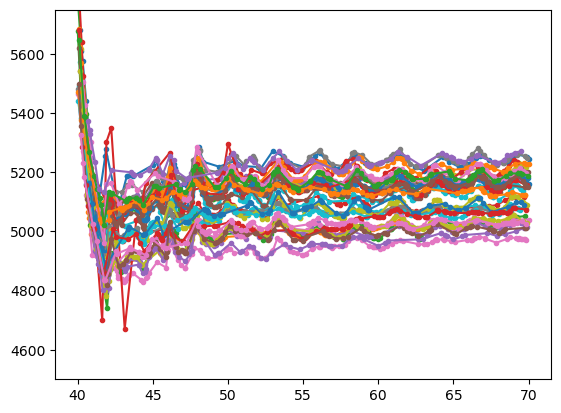

(4500.0, 5750.0)

In [88]:
for r in teff
    isnothing(r) && continue
    
    plt.plot(r[:,1], r[:,2], marker=".")
end
plt.ylim(4500,5750)

In [93]:
teff_t = []
for t in teff
    try
        isnothing(t) ? append!(teff_t, [NaN]) : append!(teff_t, [mean(t[end-20:end,2])])
    catch
        append!(teff_t, [NaN])
    end
end

In [97]:
t_success, rho_success = eachcol(results[results.phase2_success .== true, [:tt_K, :d_cgs]]);

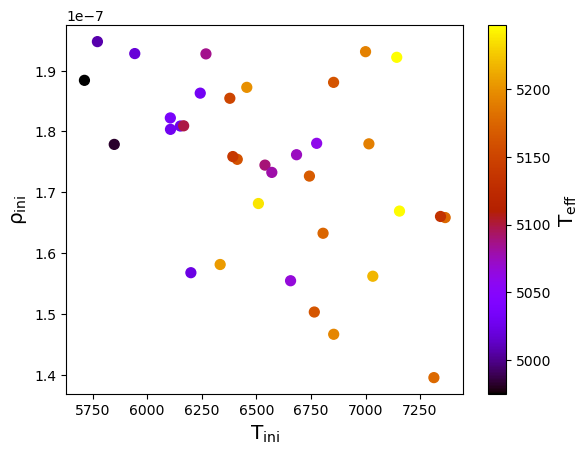

In [112]:
im = plt.scatter(t_success, rho_success, c=teff_t, cmap="gnuplot", s=50)
cbar = plt.colorbar(im)
plt.xlabel(L"\rm T_{ini}", fontsize="x-large")
plt.ylabel(L"\rm \rho_{ini}", fontsize="x-large")
cbar.set_label(L"\rm T_{eff}", fontsize="x-large")